In [1]:
import findspark
findspark.init()

import pandas as pd
import pyspark

import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
import numpy as np
import databricks.koalas as ks
from pyspark.sql import SparkSession

style.use('bmh') or plt.style.use('bmh')

In [2]:
from pyspark.sql import SparkSession

In [3]:
spark=SparkSession.builder.appName('Practica').getOrCreate()

In [4]:
spark

In [5]:
df_pyspark=spark.read.csv(
    'creditcard.csv',
    header=True, 
    inferSchema=True)

In [6]:
df_pyspark.printSchema()

root
 |-- Time: double (nullable = true)
 |-- V1: double (nullable = true)
 |-- V2: double (nullable = true)
 |-- V3: double (nullable = true)
 |-- V4: double (nullable = true)
 |-- V5: double (nullable = true)
 |-- V6: double (nullable = true)
 |-- V7: double (nullable = true)
 |-- V8: double (nullable = true)
 |-- V9: double (nullable = true)
 |-- V10: double (nullable = true)
 |-- V11: double (nullable = true)
 |-- V12: double (nullable = true)
 |-- V13: double (nullable = true)
 |-- V14: double (nullable = true)
 |-- V15: double (nullable = true)
 |-- V16: double (nullable = true)
 |-- V17: double (nullable = true)
 |-- V18: double (nullable = true)
 |-- V19: double (nullable = true)
 |-- V20: double (nullable = true)
 |-- V21: double (nullable = true)
 |-- V22: double (nullable = true)
 |-- V23: double (nullable = true)
 |-- V24: double (nullable = true)
 |-- V25: double (nullable = true)
 |-- V26: double (nullable = true)
 |-- V27: double (nullable = true)
 |-- V28: double (nulla

In [7]:
dfk=df_pyspark.to_koalas()

In [8]:
dfk.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [9]:
dfk.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.000000,84693.000000,139310.000000,172792.000000
V1,284807.0,2.235360e-15,1.958696,-56.407510,-0.920516,0.017938,1.315540,2.454930
V2,284807.0,6.865750e-17,1.651309,-72.715728,-0.598655,0.065407,0.803607,22.057729
V3,284807.0,-5.824711e-15,1.516255,-48.325589,-0.890713,0.179765,1.027036,9.382558
V4,284807.0,2.011824e-15,1.415869,-5.683171,-0.848666,-0.020100,0.743078,16.875344
V5,284807.0,3.704312e-15,1.380247,-113.743307,-0.691700,-0.054427,0.611788,34.801666
V6,284807.0,1.140034e-15,1.332271,-26.160506,-0.768296,-0.274384,0.398376,73.301626
V7,284807.0,-1.149614e-16,1.237094,-43.557242,-0.554155,0.039941,0.570273,120.589494
V8,284807.0,-2.953869e-16,1.194353,-73.216718,-0.208681,0.022322,0.327211,20.007208
V9,284807.0,-2.082079e-15,1.098632,-13.434066,-0.643272,-0.051505,0.596936,15.594995


In [10]:
class_1=dfk[dfk['Class']==1]

In [11]:
class_1.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,492.0,80746.806911,47835.365138,406.000000,41237.000000,75556.000000,128471.000000,170348.000000
V1,492.0,-4.771948,6.783687,-30.552380,-6.133987,-2.349340,-0.419820,2.132386
V2,492.0,3.623778,4.291216,-8.402154,1.183631,2.715855,4.960892,22.057729
V3,492.0,-7.033281,7.110937,-31.103685,-8.678550,-5.076070,-2.276921,2.250210
V4,492.0,4.542029,2.873318,-1.313275,2.357096,4.173516,6.348557,12.114672
V5,492.0,-3.151225,5.372468,-22.105532,-4.801176,-1.532902,0.213863,11.095089
V6,492.0,-1.397737,1.858124,-6.406267,-2.513479,-1.426545,-0.413647,6.474115
V7,492.0,-5.568731,7.206773,-43.557242,-8.058012,-3.039520,-0.950463,5.802537
V8,492.0,0.570636,6.797831,-41.044261,-0.202669,0.617738,1.760341,20.007208
V9,492.0,-2.581123,2.500896,-13.434066,-3.875643,-2.214311,-0.788388,3.353525


In [12]:
class_1=class_1.to_pandas()

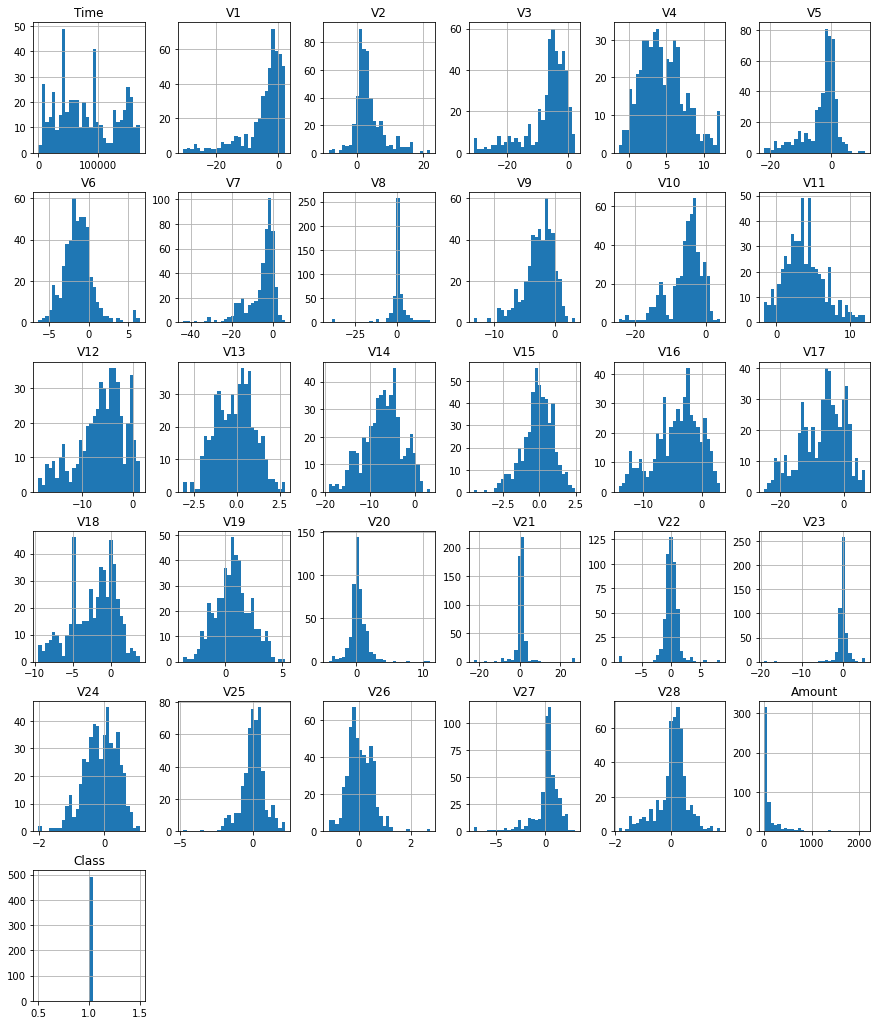

In [13]:

class_1.hist(bins=30, figsize=(15,18))
plt.show()

- No se ven datos faltantes
- Vamos a poner la lupa en time
- Podriamos transformar algunas variables con yeo-johnson en busca de un poco de mas normalidad (v1, v7, v13, v27) pero como vamos a discretizar lo obviaremos.
- En Amount vamos a discretizar

In [14]:
class_0=dfk[dfk['Class']==0]

In [15]:
class_0.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Vamos a tomar una muestra de este nuevo dataframe

In [156]:
muestra_class_0=class_0.to_pandas().sample(n=2000,random_state=5)

<AxesSubplot:xlabel='Time', ylabel='Count'>

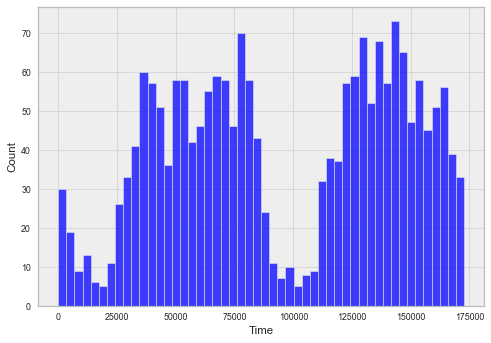

In [157]:
data=muestra_class_0.copy()

sns.histplot(data=data,x='Time',bins=50)

In [158]:
df_muestra=pd.concat([class_1,muestra_class_0], axis=0)

In [159]:
def minutos(x):
    return x/60

df_muestra['Time']=df_muestra['Time'].apply(minutos)

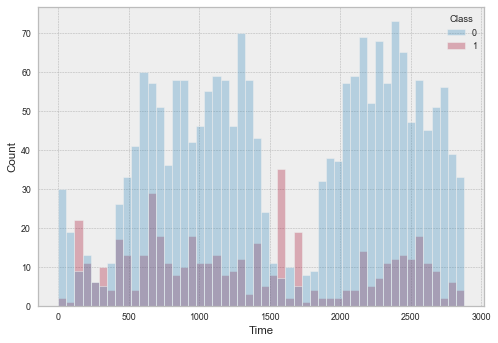

In [160]:
ax,fig=plt.subplots()
sns.histplot(data=df_muestra,x='Time',bins=50,hue='Class',alpha=0.3);

Aqui se observa lo que pareciera ser un patron, time a 1500 parece dividir el grafico con cierta simetria. Con un dataset con la fecha bien formateada podriamos analizarlo como una serie temporal. Lo dejare para mas adelante

In [161]:
df_muestra['Time_disc']=pd.qcut(df_muestra['Time'],[0,0.5,0.65,0.85,1], 
                                labels=['0-1414','1414-2054','2054-2482','2482-2878'])
df_muestra['Time_disc']=df_muestra['Time_disc'].astype('category')

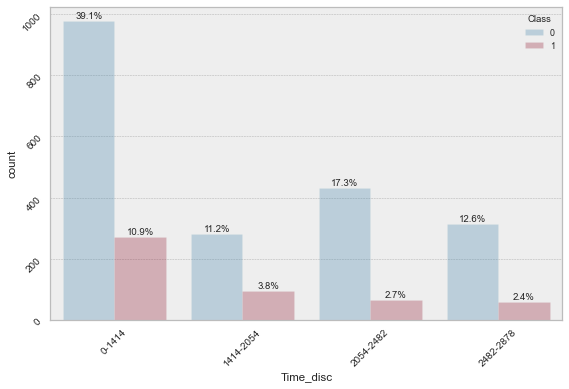

In [162]:
ax,fig=plt.subplots()
plt.tick_params(labelsize=10, labelrotation=45)
ax=sns.countplot(data=df_muestra,x='Time_disc',hue='Class',alpha=0.3);

total = len(df_muestra)
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='center')
plt.tight_layout();
plt.show();

In [163]:
pd.crosstab(df_muestra['Time_disc'],df_muestra['Class'])

Class,0,1
Time_disc,,
0-1414,975,271
1414-2054,280,94
2054-2482,431,67
2482-2878,314,60


Vamos a discretizar 'Amount' para un mejor analisis

In [164]:
df_muestra['Amount_disc']=pd.qcut(df_muestra['Amount'],[0,0.5,0.65,0.85,1],
                                  labels=['0-19.73','19.73-45.53','45.53-144.32','144.32-2616'])
df_muestra['Amount_disc']=df_muestra['Amount_disc'].astype('category')

<Figure size 432x432 with 0 Axes>

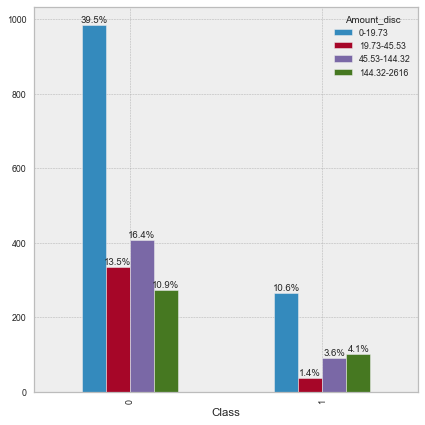

In [165]:
#df_muestra.groupby('Class')[['Time_disc', 'Amount_disc']].plot.bar()

plt.figure(figsize=(6,6))
ax=pd.crosstab(df_muestra['Class'],df_muestra['Amount_disc']).plot.bar(figsize=(6,6));

total = len(df_muestra)
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='center')
plt.tight_layout();
plt.show();

Vamos a focalizar en los fraudes (Class=1)

<Figure size 720x720 with 0 Axes>

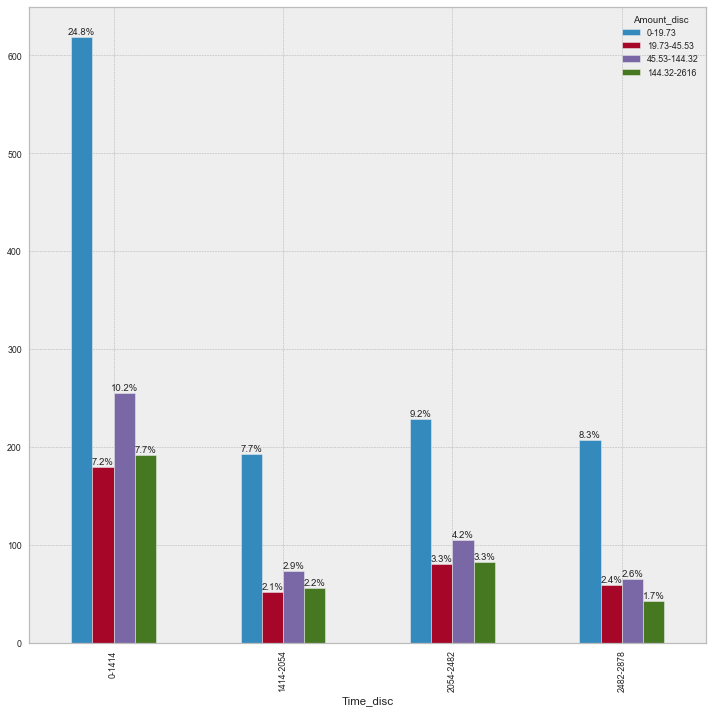

In [166]:
data=df_muestra[df_muestra['Class']==1]

plt.figure(figsize=(10,10))
ax=pd.crosstab(df_muestra['Time_disc'],df_muestra['Amount_disc']).plot.bar(figsize=(10,10));

total = len(df_muestra)
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='center')
plt.tight_layout();
plt.show();

# Observaciones:

- Una gran cantidad de fraudes ocurren en los primeros 1413 minutos (equivalentemente, en las primeras 23.55 hs), es decir en las primeras 24 hs. (Habria que chequear si ese dia fue alguna fecha especial a nivel comercial o feriado tal vez)
- En esta franja se encuentran la mitad de los datos


In [167]:
# Vamos a realizar una funcion para poder cruzar informacion de Time vs Amount vs Class a traves de una tabla dinamica

total_df=df_muestra[df_muestra['Class']==1].shape[0]

def df_pivot(df,var_index, var_column,total_df):
    
    
    df=df.copy()
    df=df[df["Class"]==1]

    df=pd.DataFrame(df.pivot_table(index=var_index,
                                   columns=var_column,
                                   values="Class",
                                   aggfunc="count",
                                   margins=True, 
                                   margins_name='Total'))
    
    ## Transformamos a dataframe y resetamos el index nuevamente 
    df=pd.DataFrame(df)
    df.reset_index(drop=False,inplace=True)
    
    
    df.drop(4,axis=0,inplace=True)
    
    
    df["porc%"]=df['Total']/total_df*100
    df.sort_values(by="porc%",ascending=False,inplace=True)
    df['porc%_Ac']=df['porc%'].cumsum()
        
    df.index.names=['Id']
    
    return(df) 

In [168]:
tabla_1=df_pivot(df_muestra,'Time_disc','Amount_disc',total_df)

In [169]:
tabla_1

Amount_disc,Time_disc,0-19.73,19.73-45.53,45.53-144.32,144.32-2616,Total,porc%,porc%_Ac
Id,,,,,,,,
0,0-1414,143,18,59,51,271,55.081301,55.081301
1,1414-2054,48,10,15,21,94,19.105691,74.186992
2,2054-2482,37,3,9,18,67,13.617886,87.804878
3,2482-2878,36,5,7,12,60,12.195122,100.000000


- Un 73.78% del impacto en class=1 se explica por la franja horaria de menos de 2054 minutos, es decir en las primera 34 hs

In [170]:
tabla_2=df_pivot(df_muestra,'Amount_disc','Time_disc',total_df)

In [171]:
tabla_2.reset_index(drop=True,inplace=True)
tabla_2

Time_disc,Amount_disc,0-1414,1414-2054,2054-2482,2482-2878,Total,porc%,porc%_Ac
0,0-19.73,143,48,37,36,264,53.658537,53.658537
1,144.32-2616,51,21,18,12,102,20.731707,74.390244
2,45.53-144.32,59,15,9,7,90,18.292683,92.682927
3,19.73-45.53,18,10,3,5,36,7.317073,100.000000


- Un 75.40% del impacto en Class=1 se explica por transacciones menores, de menos de 19.73 con un 54.67% acumulado del impacto, mientras que un 20.73% son transacciones en el rango de 144.32 a 2616.

Estamos trabajando con un dataset donde la target ocupa un 20%

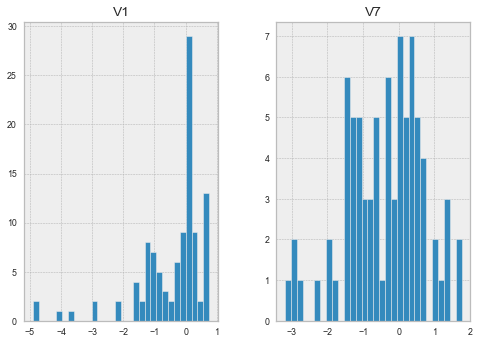

In [172]:

lista_sesgadas=['V1', 'V7']
tmp = df_muestra.copy()

for var in lista_sesgadas:

    tmp[var]=np.log(data[var])
    
tmp[lista_sesgadas].hist(bins=30)
plt.show()


# Discretizamos

In [173]:
df_muestra.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class', 'Time_disc', 'Amount_disc'],
      dtype='object')

In [174]:
df_muestra['Class'].value_counts()

0    2000
1     492
Name: Class, dtype: int64

In [175]:
# Funcion para discretizar

# Los cortes son los quantiles

ls_cortes=[0,0.25,0.5,0.75,1]

def discretizar(df,var,ls_cortes):
    df=df.copy()
    df[var]=pd.qcut(df[var],ls_cortes)
    df[var]=df[var].astype("category")
    return df[var]

#------------------------------------------------------------------------------------


# Las variables continuas discretizadas, tienen ahora un tipo de dato tipo intervalo
# Vamos a crear una funcion para transformar los intervalos en numeros enteros

def convertir_intervalos_discretas(df,variable):
    df=df.copy()
    dic_valores_nuevos={}
    
    lista_val_viejos=[x.left for x in df[variable].unique()]
    lista_val_viejos.sort()
    
    for i in range(0,len(lista_val_viejos)):
        dic_valores_nuevos.update({lista_val_viejos[i]:i})
        
    df[variable + "_corr"]=df[variable].apply(lambda x:x.left)
    df[variable + "_corr"]=df[variable + "_corr"].map(dic_valores_nuevos)

    return df

#------------------------------------------------------------------------------------


var_a_discretizar =['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 
                    'V8', 'V9', 'V10','V11', 'V12', 'V13', 'V14',
                    'V15', 'V16', 'V17', 'V18', 'V19', 'V20','V21',
                    'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28']

for var in var_a_discretizar:
    df_muestra[var + "_disc"]=discretizar(df_muestra,var,ls_cortes)
    df_muestra=convertir_intervalos_discretas(df_muestra,var + "_disc")


In [176]:
data1=df_muestra.filter(like='disc_corr')
data2=df_muestra[['Time_disc','Amount_disc','Class']]

In [177]:
data=pd.concat([data1,data2],axis=1)

In [178]:
data.head()

,V1_disc_corr,V2_disc_corr,V3_disc_corr,V4_disc_corr,V5_disc_corr,V6_disc_corr,V7_disc_corr,V8_disc_corr,V9_disc_corr,V10_disc_corr,V11_disc_corr,V12_disc_corr,V13_disc_corr,V14_disc_corr,V15_disc_corr,V16_disc_corr,V17_disc_corr,V18_disc_corr,V19_disc_corr,V20_disc_corr,V21_disc_corr,V22_disc_corr,V23_disc_corr,V24_disc_corr,V25_disc_corr,V26_disc_corr,V27_disc_corr,V28_disc_corr,Time_disc,Amount_disc,Class
541,0,3,1,3,1,0,0,3,0,0,3,0,1,0,2,0,0,2,2,2,3,1,0,2,2,2,3,0,0-1414,0-19.73,1
623,0,0,3,3,3,0,2,1,1,1,1,1,3,0,3,3,3,3,2,3,3,2,3,1,2,1,0,2,0-1414,144.32-2616,1
4920,0,3,1,3,1,2,3,0,1,0,3,0,2,0,0,0,0,0,0,0,0,0,3,1,1,0,2,0,0-1414,144.32-2616,1
6108,0,3,0,3,0,0,0,0,1,0,3,0,2,0,1,0,0,0,2,1,3,2,0,1,2,0,0,3,0-1414,45.53-144.32,1
6329,3,3,0,3,3,0,3,0,0,0,3,0,3,0,1,3,3,3,0,2,0,0,0,0,3,3,1,3,0-1414,0-19.73,1


# Separamos en conjuntos de test y entrenamiento

In [179]:
df=data.copy()
df=df.drop(['Class'],axis=1)
df=pd.get_dummies(df,columns=list(df.columns))

In [180]:
# Separemos en conjunto de entramiento y conjunto de prueba 


# para dividir en conjuntos de entrenamiento y test
from sklearn.model_selection import train_test_split

target=data["Class"]


X_train, X_test, y_train, y_test = train_test_split(
    df, # variables predictivas
    target, # target
    test_size=0.2, # porción del conjunto de datos para asignar al conjunto de prueba
    random_state=0, # estamos poniendo la semilla aquí
    stratify=target # para que la generacion de las clases este compensada
)

X_train.shape, X_test.shape

((1993, 120), (499, 120))

In [181]:
# Variables a graficar (todas menos churn)

variables_a_graficar=list(data.columns)
del(variables_a_graficar[30])

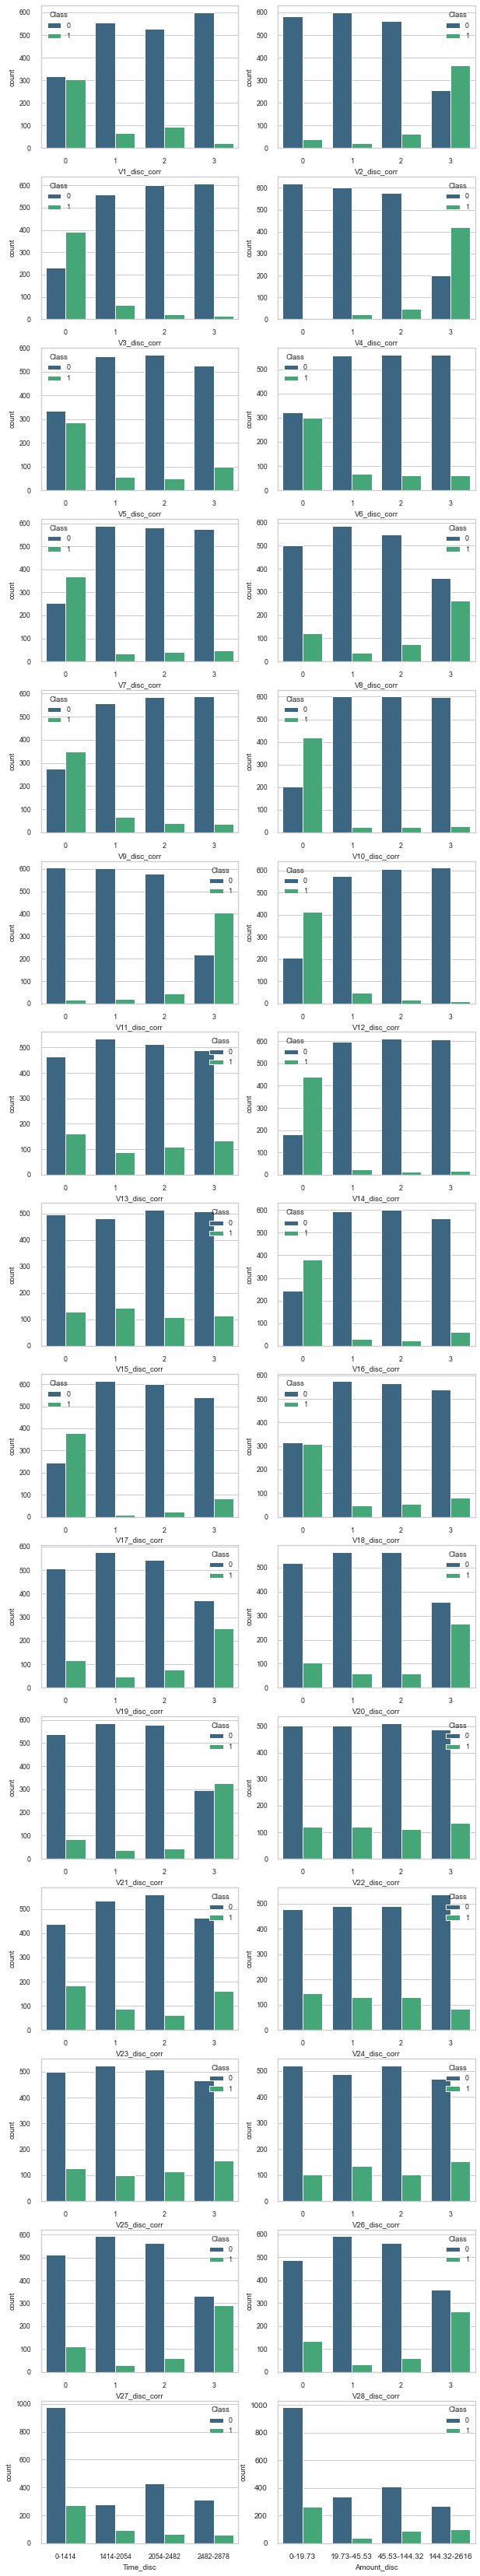

In [182]:
sns.set(font_scale=0.8, style="whitegrid")

ls_cat=variables_a_graficar

n_rows=15
n_cols=2

f, ax=plt.subplots(nrows=n_rows,
                   ncols=n_cols,
                   figsize = (10,60))

i=0

for row in range(0,n_rows,1):
    sns.set(font_scale=0.8)
    plt.tick_params(labelsize=10)
    
    for col in range(0,n_cols,1):
        sns.countplot(ax=ax[row,col],data=data, x=ls_cat[i],hue="Class",palette="viridis")
        i+=1
    
plt.show()

In [183]:

from matplotlib import style


from yellowbrick.classifier import discrimination_threshold


# Para construir los modelos
from sklearn.linear_model import LogisticRegression

# Para evaluar los modelos
from sklearn.metrics import roc_auc_score, classification_report

# Para visualizar todas las columnas del dataframe
pd.pandas.set_option('display.max_columns', None)

import warnings
warnings.filterwarnings('ignore')

# Regresion logistica

In [184]:
# configurar el modelo 
# recuerdar establecer random_state / seed

# Instancia

rl = LogisticRegression(penalty='l1', solver='saga')

# Entrenamos el modelo

rl.fit(X_train, y_train.values.ravel())

LogisticRegression(penalty='l1', solver='saga')

In [185]:
# evalua el modelomos: 

pred = rl.predict_proba(X_train)[:,1]


print('train auc: {}'.format(
    roc_auc_score(y_train, pred)))
print()

# make predictions for test set
pred = rl.predict_proba(X_test)[:,1]

# determine auc

print('test auc: {}'.format(
    roc_auc_score(y_test, pred)))
print()

rl_auc={'Auc':np.round(roc_auc_score(y_test, pred),2)}

train auc: 0.9925302162849872

test auc: 0.9672727272727273



In [186]:
# Importante: Vamos a tomar la prediccion y no las probabilidades

pred=rl.predict(X_test)
print (classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98       400
           1       0.93      0.87      0.90        99

    accuracy                           0.96       499
   macro avg       0.95      0.93      0.94       499
weighted avg       0.96      0.96      0.96       499



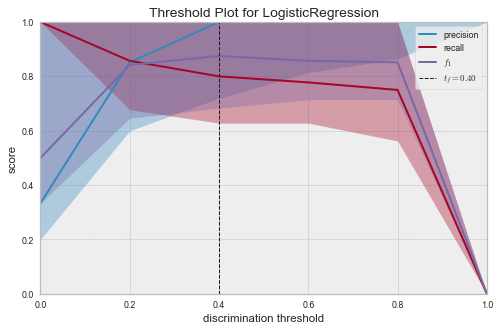

In [187]:
# Grafico de umbrales

# Parametros para el grafico
style.use('bmh') or plt.style.use('bmh')
fig, ax=plt.subplots(figsize=(8,5))

# Llamamos a la funcion que grafica
discrimination_threshold(rl,X_test,y_test,exclude='queue_rate',ax=ax);


In [188]:
y_test.reset_index(drop=True)

0      0
1      0
2      0
3      0
4      1
      ..
494    0
495    0
496    0
497    0
498    0
Name: Class, Length: 499, dtype: int32

In [189]:
# evaluemos la distribución de los errores: 

y_test.reset_index(drop=True, inplace=True)

preds = pd.Series(rl.predict(X_test))

preds

0      0
1      0
2      0
3      0
4      1
      ..
494    0
495    0
496    0
497    0
498    0
Length: 499, dtype: int32

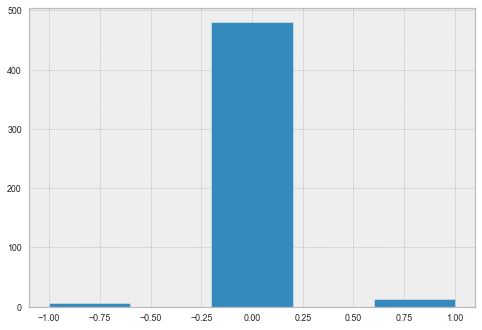

In [190]:
# evaluemos la distribución de los errores: 
# Deben distribuirse con bastante normalidad

errors = y_test - preds
errors.hist(bins=5,density=False)
plt.show()

In [191]:
rl.coef_.ravel()

array([ 0.53724633,  0.        ,  0.        , -0.35212735,  0.        ,
       -0.06978731,  0.19441525, -0.37448241,  0.65540399,  0.        ,
       -0.38429698, -0.88300935, -2.49883689, -0.56643784,  0.        ,
        2.13492855, -0.20619449, -0.26612089,  0.        ,  0.10855168,
        0.        ,  0.20763951,  0.        , -0.06069451,  1.05192988,
       -0.08931987,  0.        , -0.34298452,  0.        ,  0.01180367,
       -0.03434598, -1.29140437,  0.40260136, -0.24534032,  0.        ,
        0.        ,  1.50219351, -0.24686813,  0.        , -0.774328  ,
       -0.87604646, -0.54641171,  0.49749064,  0.        ,  0.48613792,
        0.15602387, -0.6664123 , -1.73939407,  0.03764849,  0.        ,
        0.        ,  0.        ,  0.96777992,  0.        , -0.38041929,
       -1.23974356,  0.        ,  0.        ,  0.        , -0.28385583,
        1.17253826,  0.        ,  0.        , -0.22979967,  0.        ,
       -0.71507631,  0.19383434, -0.22200764, -0.57629718,  0.  

## Graficos

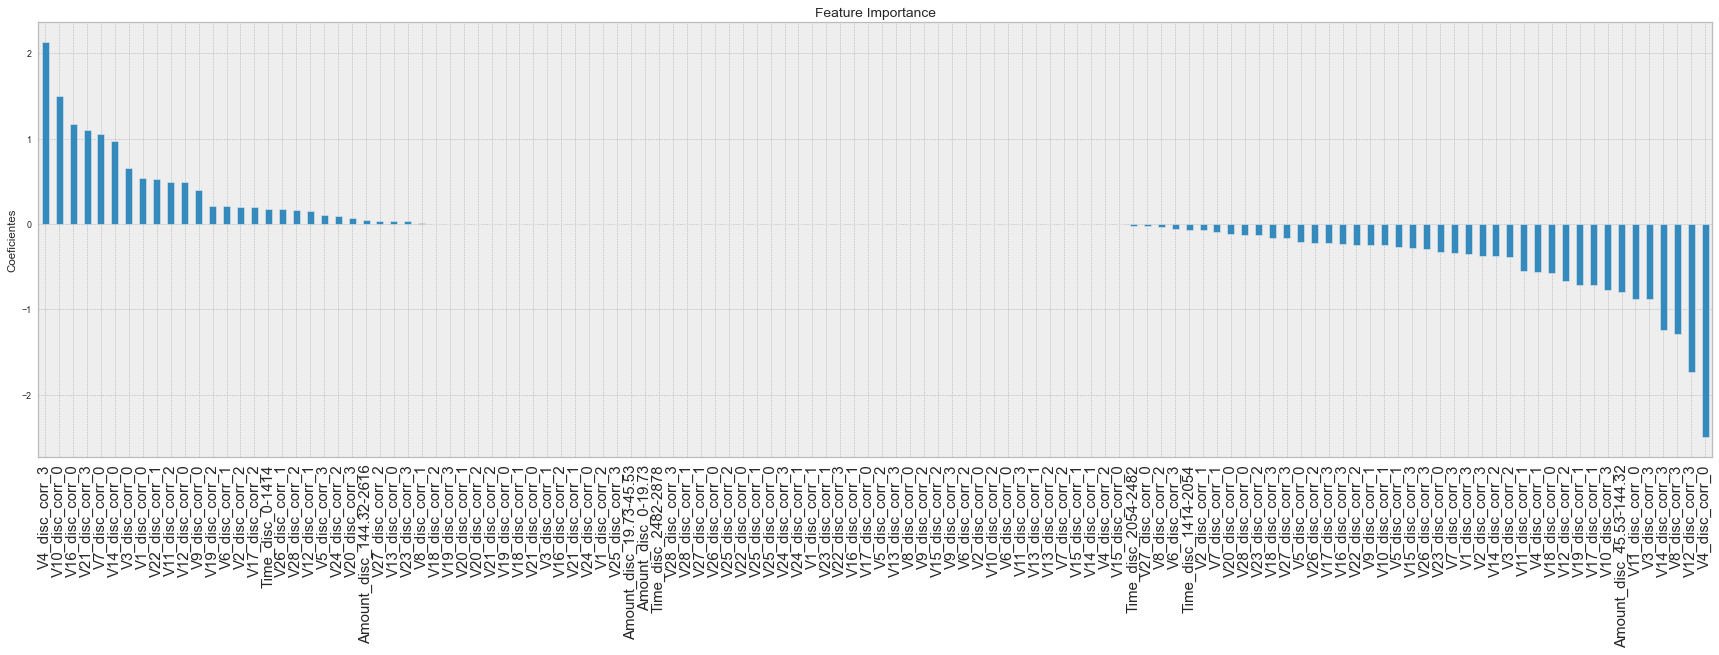

In [192]:
# Finalmente, solo por diversión, veamos la importancia de las variables
style.use('bmh') or plt.style.use('bmh')

importance = pd.Series(rl.coef_.ravel())
importance.index = rl.feature_names_in_
importance.sort_values(inplace=True, ascending=False)
importance.plot.bar(figsize=(30,8))
plt.xticks(size=15)
plt.ylabel('Coeficientes')
plt.title('Feature Importance');

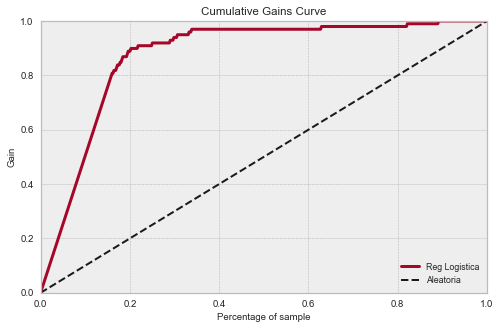

In [193]:
import scikitplot as skplt


# Parametros de grafico
style.use('bmh') or plt.style.use('bmh')
fig, ax=plt.subplots(figsize=(8,5))

# Instanciamos al grafico
skplt.metrics.plot_cumulative_gain(y_test,rl.predict_proba(X_test),ax=ax)
del ax.lines[0]

# # Agregamos Lineas indicadoras
# ax.axvline(
#     x            =0.4,
#     c            ='red',
#     linestyle    ='--',
#     label        ='40% de clientes'
# )

# ax.axvline(
#     x            =0.6,
#     c            ='blue',
#     linestyle    ='--',
#     label        ='60% de clientes'
# )

# Modificamos la legenda
plt.legend(labels=['Reg Logistica', 'Aleatoria']);

# Random Forest

In [203]:
# configurar el modelo 
from sklearn.ensemble import RandomForestClassifier

# Instancia

#Instanciar
rf = RandomForestClassifier(n_estimators=240, max_features=7, max_depth=4)

#Entrenar
rf.fit(X_train,y_train)

RandomForestClassifier(max_depth=4, max_features=7, n_estimators=240)

In [204]:
# evalua el modelomos: 

pred = rf.predict_proba(X_train)[:,1]


print('train auc: {}'.format(
    roc_auc_score(y_train, pred)))
print()

# make predictions for test set
pred = rf.predict_proba(X_test)[:,1]

# determine auc

print('test auc: {}'.format(
    roc_auc_score(y_test, pred)))
print()

rf_auc={'Auc':np.round(roc_auc_score(y_test, pred),2)}

train auc: 0.9848966284987278

test auc: 0.9564646464646465



In [205]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 4,
 'max_features': 7,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 240,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

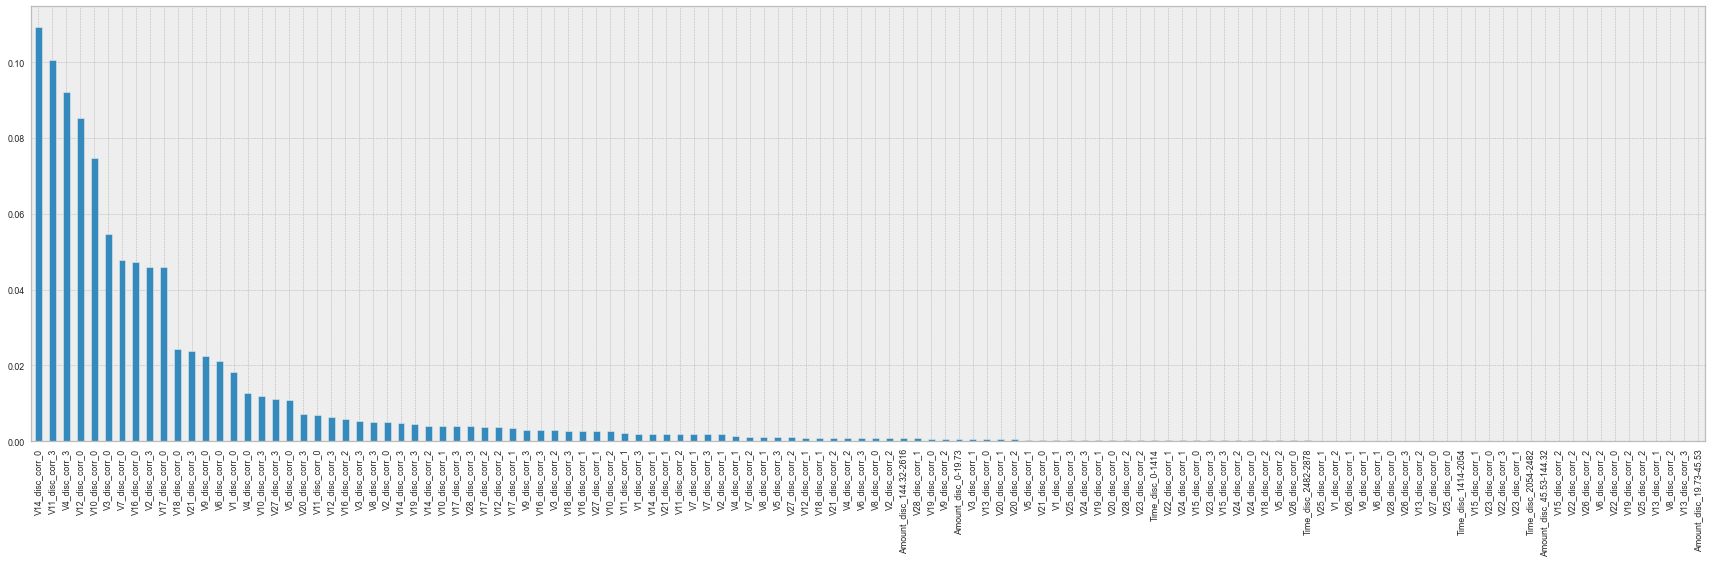

In [206]:
pd.Series(rf.feature_importances_,index = X_test.columns).sort_values(ascending = False).plot(kind = 'bar', figsize=(30,8));

# XGBoost

In [57]:
from xgboost import XGBClassifier

In [207]:
# configurar el modelo 

#Instanciar
xgb = XGBClassifier(use_label_encoder=False)

xgb.fit(X_train, y_train,
        early_stopping_rounds=5,
        eval_set=[(X_test,y_test)],
        eval_metric='auc'
)

[0]	validation_0-auc:0.94736
[1]	validation_0-auc:0.94818
[2]	validation_0-auc:0.94873
[3]	validation_0-auc:0.94966
[4]	validation_0-auc:0.94962
[5]	validation_0-auc:0.95225
[6]	validation_0-auc:0.96429
[7]	validation_0-auc:0.96476
[8]	validation_0-auc:0.96451
[9]	validation_0-auc:0.96442
[10]	validation_0-auc:0.96423
[11]	validation_0-auc:0.96629
[12]	validation_0-auc:0.96672
[13]	validation_0-auc:0.96831
[14]	validation_0-auc:0.97024
[15]	validation_0-auc:0.97097
[16]	validation_0-auc:0.97029
[17]	validation_0-auc:0.96876
[18]	validation_0-auc:0.96992
[19]	validation_0-auc:0.96972
[20]	validation_0-auc:0.96866


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

In [208]:
# evalua el modelomos: 

# hacemos predicciones sobre el conjunto de entranamiento
pred = xgb.predict_proba(X_train)[:,1]


print('train auc: {}'.format(
    roc_auc_score(y_train, pred)))
print()

# hacemos predicciones sobre el conjunto de test
pred = xgb.predict_proba(X_test)[:,1]

# determinamos auc

print('test auc: {}'.format(
    roc_auc_score(y_test, pred)))
print()

xgb_auc={'Auc':np.round(roc_auc_score(y_test, pred),2)}

train auc: 0.9998902671755725

test auc: 0.9709722222222222



In [209]:
xgb.get_params()

{'objective': 'binary:logistic',
 'use_label_encoder': False,
 'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'enable_categorical': False,
 'gamma': 0,
 'gpu_id': -1,
 'importance_type': None,
 'interaction_constraints': '',
 'learning_rate': 0.300000012,
 'max_delta_step': 0,
 'max_depth': 6,
 'min_child_weight': 1,
 'missing': nan,
 'monotone_constraints': '()',
 'n_estimators': 100,
 'n_jobs': 4,
 'num_parallel_tree': 1,
 'predictor': 'auto',
 'random_state': 0,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'subsample': 1,
 'tree_method': 'exact',
 'validate_parameters': 1,
 'verbosity': None}

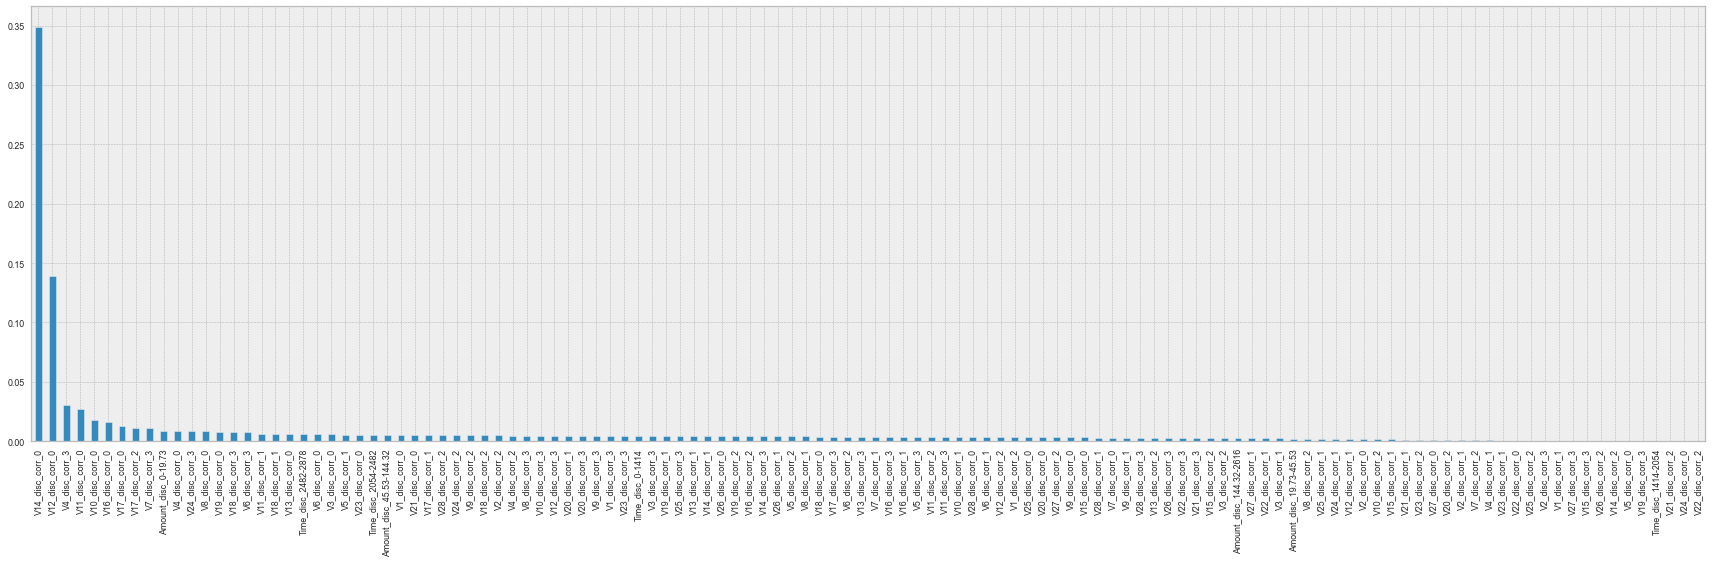

In [210]:
pd.Series(xgb.feature_importances_,index = X_test.columns).sort_values(ascending = False).plot(kind = 'bar', figsize=(30,8));

# Redes Neuronales

In [111]:
import tensorflow as tf
from sklearn.metrics import confusion_matrix

In [211]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(units = 120, activation='relu', input_shape=(120, )))
#model.add(tf.keras.layers.Dense(units = 500, activation='relu'))
#model.add(tf.keras.layers.Dense(units = 500, activation='relu'))
model.add(tf.keras.layers.Dense(units = 1, activation='sigmoid'))

In [212]:
model.compile(optimizer='Adam', loss = 'binary_crossentropy', metrics=['AUC'])

In [213]:
# oversampler = SMOTE(random_state=0)
# smote_train, smote_target = oversampler.fit_sample(X_train, y_train)
# epochs_hist = model.fit(smote_train, smote_target, epochs = 100, batch_size = 50)
epochs_hist = model.fit(X_train, y_train, epochs = 10, batch_size=50)

Epoch 1/10
40/40 [==============================] - 3s 7ms/step - loss: 0.2883 - auc: 0.9025
Epoch 2/10
40/40 [==============================] - 0s 7ms/step - loss: 0.1300 - auc: 0.9704
Epoch 3/10
40/40 [==============================] - 0s 8ms/step - loss: 0.1085 - auc: 0.9818
Epoch 4/10
40/40 [==============================] - 0s 7ms/step - loss: 0.0967 - auc: 0.9866
Epoch 5/10
40/40 [==============================] - 0s 7ms/step - loss: 0.0881 - auc: 0.9897
Epoch 6/10
40/40 [==============================] - 0s 7ms/step - loss: 0.0810 - auc: 0.9918A: 0s - loss: 0.0792 - auc: 0.9
Epoch 7/10
40/40 [==============================] - 0s 7ms/step - loss: 0.0755 - auc: 0.9936
Epoch 8/10
40/40 [==============================] - 0s 7ms/step - loss: 0.0709 - auc: 0.9944
Epoch 9/10
40/40 [==============================] - 0s 7ms/step - loss: 0.0645 - auc: 0.9961A: 0s - loss: 0.0655 - auc: 0.9
Epoch 10/10
40/40 [==============================] - 0s 7ms/step - loss: 0.0600 - auc: 0.9966


In [214]:
y_pred = model.predict(X_test)
y_pred=pd.DataFrame(y_pred,columns=['pred']) # La columna pred tiene los logits, hay que transformarlos
#y_pred['pred_proba']=y_pred['pred'].apply(lambda x: 1/(1+np.exp(-x)))
y_pred

,pred
0,0.003547
1,0.036212
2,0.010377
3,0.002587
4,0.997492
...,...
494,0.001697
495,0.032493
496,0.001339
497,0.013681


In [216]:
y_pred['prediccion'] = np.where(y_pred['pred']>=0.40,1,0)

In [217]:
epochs_hist.history.keys()

dict_keys(['loss', 'auc'])

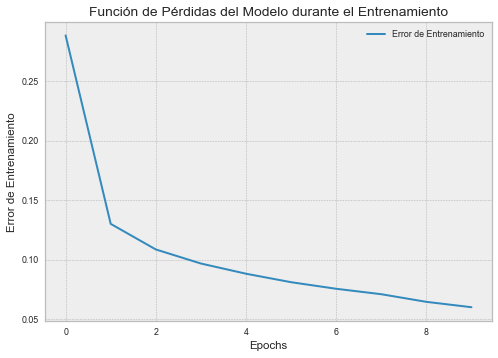

In [218]:
plt.plot(epochs_hist.history['loss'])
plt.title("Función de Pérdidas del Modelo durante el Entrenamiento")
plt.xlabel("Epochs")
plt.ylabel("Error de Entrenamiento")
plt.legend(["Error de Entrenamiento"])

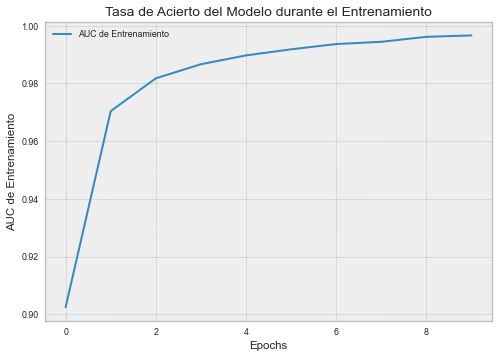

In [219]:
plt.plot(epochs_hist.history['auc'])
plt.title("Tasa de Acierto del Modelo durante el Entrenamiento")
plt.xlabel("Epochs")
plt.ylabel("AUC de Entrenamiento")
plt.legend(["AUC de Entrenamiento"])

In [220]:
pd.crosstab(y_test, y_pred['prediccion']).T

Class,0,1
prediccion,,
0,393,13
1,7,86
